# Задание

Требуется провести анализ изменения цены лечения в 2022 году относительно 2021 года в медицинской клинике и определить ключевые драйверы изменения цены лечения.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ознакомимся с данными

In [48]:
df = pd.read_excel('data_test_task_2022.xlsx')
df.head(5)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.0,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.0,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.0,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.0,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.0,26


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


#### Описание данных

- record_id- уникальный идентификатор строки данных
- service_date - дата оказания медицинской услуги
- service_name - наименование медицинской услуги
- service_number - количество услуг
- service_amount - сумма выплат (стоимость оказанных услуг в рублях)
- insured - уникальный идентификатор пациента
- sex_id - пол пациента
- age_for_service_date - возраст пациента

In [50]:
# переведем service_date в формат даты
df['service_date'] = pd.to_datetime(df['service_date']).dt.date

In [51]:
# разобъем дату на числа
df['year'] = pd.DatetimeIndex(df['service_date']).year
df['month'] = pd.DatetimeIndex(df['service_date']).month
df['day'] = pd.DatetimeIndex(df['service_date']).day

In [52]:
# посмотрим на уникальные значения столбца service_name (какие вообще услуги бывают)
df['service_name'].unique()

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Триглицериды', 'Холестерин', 'АЛТ (аланинаминотрансфераза)',
       'Альдостерон', 'Кортизол (кровь)', 'Ренин + Ангио

In [53]:
# Уникальных услуг очень много. Посмотрим на частоту их появления
df['service_name'].value_counts(ascending = False).head(30)

Прием первичный                                                         6058
Прием повторный                                                         4477
Взятие крови из периферической вены                                     4215
Общий анализ крови (лейкоцитарная форм,, СОЭ)                           3190
Магнитотерапия (1 сеанс)                                                2838
Взятие мазка                                                            1567
Общий анализ мочи                                                       1550
Лазеротерапия (1 сеанс)                                                 1313
Интерференционные токи (1 сеанс) (4 поля)                               1195
Гинекологический мазок                                                  1194
Прием трапевта, первичный                                               1157
Прием гинеколога, повторный                                             1139
Рефрактометрия                                                           909

In [54]:
# проверим на пропуски
df.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
year                     0
month                    0
day                      0
dtype: int64

In [55]:
# пропусков совсем немного, так что удалим их
df = df.dropna()

In [56]:
df.isna().sum()

record_id               0
service_date            0
service_name            0
service_amount          0
service_number          0
insured                 0
sex_id                  0
age_for_service_date    0
year                    0
month                   0
day                     0
dtype: int64

In [57]:
# проверим на явные дубликаты
df.duplicated().sum()

0

In [58]:
# удалим неинформативные столбцы
df = df.drop(['record_id'], axis = 1)

In [59]:
# Заменим категорию пола строковым значением
df.loc[df['sex_id']==1.0, 'sex_id'] = 'male'
df.loc[df['sex_id']==2.0, 'sex_id'] = 'female'

Почему за цифровыми значениями скрываются именно эти половые категории, мы выяяснили, посмотрев несколько характерных обращений.

In [60]:
# взглянем на таблицу еще раз
df.head(10)

,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,month,day
0,2021-01-24,Прием первичный,1470,1,490777,female,26,2021,1,24
1,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,female,26,2021,1,24
2,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,female,26,2021,1,24
3,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,female,26,2021,1,24
4,2021-01-24,Ревматоидный фактор,420,1,490777,female,26,2021,1,24
5,2021-01-24,С-реактивный белок,420,1,490777,female,26,2021,1,24
6,2021-01-24,Взятие крови из периферической вены,158,1,490777,female,26,2021,1,24
7,2021-01-26,Прием первичный,1470,1,490777,female,26,2021,1,26
8,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,female,26,2021,1,26
9,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,female,26,2021,1,26


### Знакомство с данными: выводы

    1. Мы открыли таблицу, ознакомились с одержанием, посмотрели значения столбцов
    2. Преобразовали столбец даты приема в нужный тип данных и в три для дальнейшей работы
    3. Удалили пропуски
    4. Удалили неинформтивные столбцы
    4. Проверили на явные дуликаты

### Анализ данных

Так как мы рассматриваем изменнеия в данных во времени, то давайте более подробно рассмотрим именно этот столбец. Рассмотрим поещаемость и прибыль по годам.


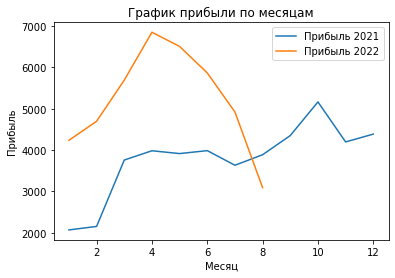

In [61]:
plt.plot(df.loc[df['year']==2021].groupby('month').agg({'service_number':'sum'}))
plt.plot(df.loc[df['year']==2022].groupby('month').agg({'service_number':'sum'}))

plt.legend(['Прибыль 2021', 'Прибыль 2022'])
plt.title('График прибыли по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')

plt.show()

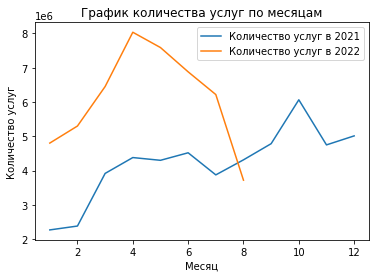

In [62]:
# Количество услуг в 2021 году по месяцам
plt.plot(df.loc[df['year']==2021].groupby('month').agg({'service_amount':'sum'}))
plt.plot(df.loc[df['year']==2022].groupby('month').agg({'service_amount':'sum'}))

plt.legend(['Количество услуг в 2021', 'Количество услуг в 2022'])
plt.title('График количества услуг по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество услуг')

plt.show()

#### Посмотрим, добавились ли новые услуги в 2022 году


In [63]:
l_21 = list(df.loc[df['year']==2021]['service_name'])
l_22 = list(df.loc[df['year']==2022]['service_name'])

new_service = []

for i in l_22:
    if i not in l_21:
        new_service.append(i)
        
print(set(new_service))

{'Посев грудного молока из одной железы с определением чувствительности к антибиотикам (левая железа)', 'Рентгенография (цифровая) органов грудной клетки ( 2 проекции, запись на диск )', 'Ультразвуковое исследование полового члена с цветным дуплексным (триплексным) сканированием пенильного кровотока (без стоимости препарата)', 'Удаление подошвенной бородавки (1 кв,см)', 'СА-72-4', 'Прием логопеда, первичный', 'Эндоскопическая полипэктомия 1-й кат, ( до 0,5см )', 'АТ к лямблии суммарный (IgG/IgM) (титр)', '(4 E)Аллергопанель IgE (Говядина, Телятина, Свинина, Баранина, Курица, Индейка, Утка, Гусь)', 'Уретроскопия', 'Ультразвуковое исследование глазного яблока', 'Ультразвуковое исследование органов мошонки', 'Рентгенография (цифровая) пояснично-крестцового отдела позвоночника ( 2 снимка, запись на диск)', 'Антитела к возбудителю иерсиниоза (03; 09)', 'Удаление СО2 лазером (бородавка)', 'Вакцинация вакциной "Ультрикс квадри"', 'ПШЕНИЦА IgE', 'Коррекция полимерной/гипсовой повязки', 'ВТЭС, 

In [64]:
print('Количество услуг в 2021 году:',len(df.loc[df['year']==2021]['service_name'].unique()))
print('Количество услуг в 2022 году:',len(df.loc[df['year']==2022]['service_name'].unique()))
print('Количество услуг добавленных в 2022 году:',len(set(new_service)))


Количество услуг в 2021 году: 739
Количество услуг в 2022 году: 679
Количество услуг добавленных в 2022 году: 136


#### Посмортим, какого возраста пациенты лечились в 21 и в 22 годах

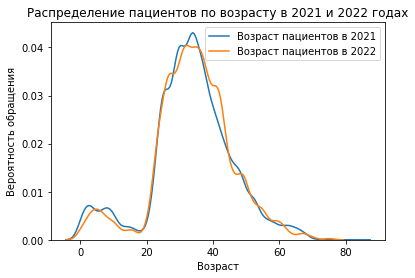

In [65]:
sns.kdeplot(df.loc[df['year']==2021]['age_for_service_date'])
sns.kdeplot(df.loc[df['year']==2022]['age_for_service_date'])

plt.legend(['Возраст пациентов в 2021', 'Возраст пациентов в 2022'])
plt.title('Распределение пациентов по возрасту в 2021 и 2022 годах')
plt.xlabel('Возраст')
plt.ylabel('Вероятность обращения')

plt.show()

#### Посмортим, какого пола пациенты лечились в 21 и в 22 годах

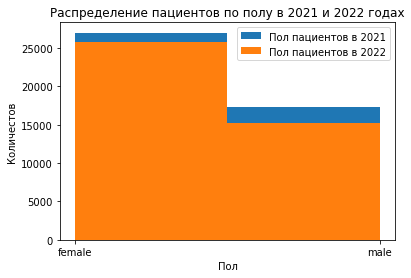

In [66]:
plt.hist(df.loc[df['year']==2021]['sex_id'], bins=2)
plt.hist(df.loc[df['year']==2022]['sex_id'], bins=2)

plt.legend(['Пол пациентов в 2021', 'Пол пациентов в 2022'])
plt.title('Распределение пациентов по полу в 2021 и 2022 годах')
plt.xlabel('Пол')
plt.ylabel('Количестов')

plt.show()

#### Посмотрим, кто больше тратить и как менялась динамика

<div class="alert alert-info"> 
Важно отметить:
    
            1. для рассчета стреднего все равно, сколько элементов перебрать, но у нас есть явно выраженная сезонность обращений и мы теряем пул услуг, связанных с ней.
            2. в 2022 году данные прерываются в августе, именно поэтому аналогичным периодом мы будем называть время с начала года до конца августа.
    
С учетом этих двух факторов посмотрим данные за АНАЛОГИЧНЫЙ период в 21 и в 22 году.
</div>

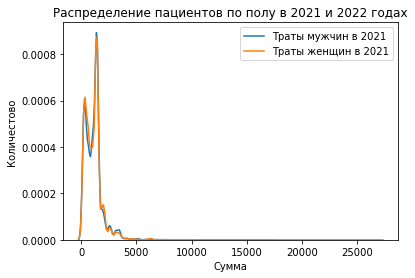

In [67]:
sns.kdeplot(df.loc[(df['year']==2021) & (df['month']<=8) & (df['sex_id']=='male')]['service_amount'])
sns.kdeplot(df.loc[(df['year']==2021) & (df['month']<=8) & (df['sex_id']=='female')]['service_amount'])

plt.legend(['Траты мужчин в 2021', 'Траты женщин в 2021'])
plt.title('Распределение пациентов по полу в 2021 и 2022 годах')
plt.xlabel('Сумма')
plt.ylabel('Количестово')

plt.show()

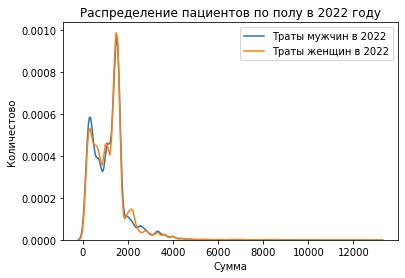

In [68]:
sns.kdeplot(df.loc[(df['year']==2022) & (df['month']<=8) & (df['sex_id']=='male')]['service_amount'])
sns.kdeplot(df.loc[(df['year']==2022) & (df['month']<=8) & (df['sex_id']=='female')]['service_amount'])

plt.legend(['Траты мужчин в 2022', 'Траты женщин в 2022'])
plt.title('Распределение пациентов по полу в 2022 году')
plt.xlabel('Сумма')
plt.ylabel('Количестово')

plt.show()

In [69]:
print('Средняя сумма лечения мужчины за 2021 год:',\
      (df.loc[(df['year']==2021) & (df['month']<=8) & (df['sex_id']=='male')].groupby('insured').agg({'service_amount':'sum'})).mean())
print('Средняя сумма лечения мужчины за 2022 год:',\
      (df.loc[(df['year']==2022) & (df['month']<=8) & (df['sex_id']=='male')].groupby('insured').agg({'service_amount':'sum'})).mean())
print()
print('Средняя сумма лечения женщины за 2021 год:',\
      (df.loc[(df['year']==2021) & (df['month']<=8) & (df['sex_id']=='female')].groupby('insured').agg({'service_amount':'sum'})).mean())
print('Средняя сумма лечения женщины за 2022 год:',\
      (df.loc[(df['year']==2022) & (df['month']<=8) & (df['sex_id']=='female')].groupby('insured').agg({'service_amount':'sum'})).mean())


Средняя сумма лечения мужчины за 2021 год: service_amount    15953.412414
dtype: float64
Средняя сумма лечения мужчины за 2022 год: service_amount    15516.002577
dtype: float64

Средняя сумма лечения женщины за 2021 год: service_amount    18259.853877
dtype: float64
Средняя сумма лечения женщины за 2022 год: service_amount    19413.706842
dtype: float64


#### Рассмотрим среднюю стоимость обслуживания одного пациента в 21 и в 22 году

In [70]:
print('Средняя стоимость лечения одного пациента в 2021 году',\
      df.loc[(df['year']==2021) & (df['month'] <= 8)].groupby('insured').agg({'service_amount':'sum'}).mean())
print('Медианная стоимость лечения одного пациента в 2021 году',\
      df.loc[(df['year']==2021) & (df['month'] <= 8)].groupby('insured').agg({'service_amount':'median'}).mean())

print()
print()

print('Средняя стоимость лечения одного пациента в 2022 году',\
      df.loc[(df['year']==2022) & (df['month'] <= 8)].groupby('insured').agg({'service_amount':'sum'}).mean())
print('Медианная стоимость лечения одного пациента в 2022 году',\
      df.loc[(df['year']==2022) & (df['month'] <= 8)].groupby('insured').agg({'service_amount':'median'}).mean())

Средняя стоимость лечения одного пациента в 2021 году service_amount    17293.839977
dtype: float64
Медианная стоимость лечения одного пациента в 2021 году service_amount    1185.989601
dtype: float64


Средняя стоимость лечения одного пациента в 2022 году service_amount    17768.103736
dtype: float64
Медианная стоимость лечения одного пациента в 2022 году service_amount    1232.999637
dtype: float64


### Анализ данных: выводы

    1. Данные за 2022 год неполные, поэтому общие трендны будем описывать с этой оговоркой.
    2. В прибыли и количестве проданных услуг наблюдается:
        - тренд на рост
        - сезонные скачки с февраля по март и  с сентября по октябрь (по 1 месяцу)
    3. Прибыль и количество проданных услуг сильно связаны друг с другом
    4. В 2022 году добавилось 136 новых услуг, при этом общее число возможных услуг упало. 
    5. Распределение пациентов по полу и возрасту совпадает в 21 и в 22 годах.
    7. Средняя стоимость годового лечения у мужчин осталась прежней, а у женщин выросла на 6%.
    8. Средняя стоимость лечения 1 пациента в год увеличилась почти на 2,7%
    9. Медианная стоимость лечения 1 пациента в год выросла на 0.4 %

# Проверка гипотез

### Гипотеза 1:

####  Н0: Рост цены на услуги не ведет  к росту средней стоимости лечения одного пациента.
####  Н1: Рост цены на услуги ведет к росту средней стоимости лечения одного пациента.

In [71]:
# объединим таблицу так, чтобы каждой услуге соответствовала цена в 21 и в 22 году

df_names = df.loc[(df['year']==2021) & (df['service_number']==1) & (df['month'] <= 8)][['service_name','service_amount']].merge(df.loc[(df['year']==2022) & (df['service_number']==1) & (df['month'] <= 8)][['service_name','service_amount']], on = 'service_name', how='outer')                                            
df_names.head()


,service_name,service_amount_x,service_amount_y
0,Прием первичный,1470.0,NaN
1,Прием первичный,1470.0,NaN
2,Прием первичный,1470.0,NaN
3,Прием первичный,1470.0,NaN
4,Прием первичный,1470.0,NaN


In [72]:
#    Уберем все строки где:
# 1. услуги не было в какой-то из годов
# 2. строки полностью повторяют друг дргуа


df_names = df_names.dropna()
df_names = df_names.drop_duplicates()


df_names.head(10)

,service_name,service_amount_x,service_amount_y
4473,"Взятие материала на посев, цитологическое иссл...",284.0,300.0
4522,"Взятие материала на посев, цитологическое иссл...",284.0,330.0
7821,"Посев отдел, дыхательных путей - слизистая зев...",1134.0,1190.0
7866,"Посев отдел, дыхательных путей - слизистая зев...",1134.0,1200.0
9641,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693.0,730.0
10628,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693.0,1800.0
10742,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693.0,800.0
1517539,Ревматоидный фактор,420.0,440.0
1517557,Ревматоидный фактор,420.0,480.0
1517861,С-реактивный белок,420.0,440.0


In [73]:
# Добавим столбец с разницей цены за 22 и 21 год
# Добавим столбец с нулем для дальнейшей визуализации

df_names['diff'] = df_names['service_amount_y'] - df_names['service_amount_x']
df_names['zeros'] = df_names['service_amount_y']-df_names['service_amount_y']
df_names.head()

df_names.sort_values(by='diff', ascending = False)

,service_name,service_amount_x,service_amount_y,diff,zeros
10628,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693.0,1800.0,1107.0,0.0
8335688,Дуплексное сканирование вен нижних конечностей,2625.0,3700.0,1075.0,0.0
8547676,Удаление вросшего ногтя,6300.0,7280.0,980.0,0.0
8612199,Колоноскопия с забором биопсии,6164.0,7120.0,956.0,0.0
8611651,Хирургическое удаление доброкачественной опухо...,7665.0,8400.0,735.0,0.0
...,...,...,...,...,...
8536335,Осмотр кожи под увеличением (дерматоскопия),777.0,640.0,-137.0,0.0
8619081,Исследование мокроты,809.0,600.0,-209.0,0.0
7047809,Рентгенография шейного отдела позвоночника (2 ...,2070.0,1680.0,-390.0,0.0
7047629,Рентгенография шейного отдела позвоночника (2 ...,2070.0,1530.0,-540.0,0.0


Полная таблица показала нам (с двух концов) как лидеров по приросту цены в 2022 году, так и лидеров по удешевлению в 2022 году

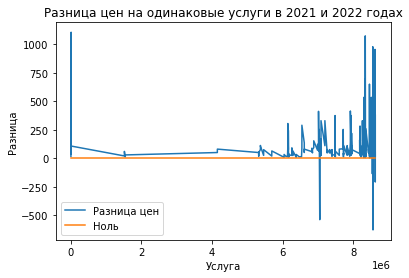

In [74]:
plt.plot(df_names['diff'])
plt.plot(df_names['zeros'])

plt.legend(['Разница цен', 'Ноль'])
plt.title('Разница цен на одинаковые услуги в 2021 и 2022 годах')
plt.xlabel('Услуга')
plt.ylabel('Разница')

plt.show()

In [75]:
# И напоследок посмотрим за средним изменением цены
print('Средняя цена на услугу в 2021 году:', df_names['service_amount_x'].mean())
print('Средняя цена на услугу в 2022 году:', df_names['service_amount_y'].mean())
print()
print('Средний рост цены на услугу:', df_names['diff'].mean())
print('Относительный рост цены на услугу:', round(df_names['service_amount_y'].mean()/df_names['service_amount_x'].mean()-1, 2)*100,'%')

Средняя цена на услугу в 2021 году: 1219.6876790830945
Средняя цена на услугу в 2022 году: 1315.4469914040114

Средний рост цены на услугу: 95.7593123209169
Относительный рост цены на услугу: 8.0 %


### Вывод: 
#### Н0 отвергаем в пользу H1.  
С ростом цен на услуги на 5%  за год средняя стоимость обслуживание одного пациента увеличивается на 2,7% за год.

### Гипотеза 2:
#### Н0: Изменения интенсивности лечения пациентов не повлияло на среднюю стоимость обслуживания 1 пациента
#### Н1: Изменения интенсивности лечения пациентов повлияло на среднюю стоимость обслуживания 1 пациента

In [76]:
# Рассмотрим, сколько услуг в среднем заказывал 1 пациент в 21 и в 22 годах

print('Cреднее количество услуг на 1 пациента за 2021 год:',\
      (df.loc[(df['year']==2021) & (df['month'] <= 8)].groupby('insured').agg({'insured':'count'})).mean())

print('Cреднее количество услуг на 1 пациента за 2021 год:',\
      (df.loc[(df['year']==2022) & (df['month'] <= 8)].groupby('insured').agg({'insured':'count'})).mean())




Cреднее количество услуг на 1 пациента за 2021 год: insured    15.433276
dtype: float64
Cреднее количество услуг на 1 пациента за 2021 год: insured    14.862894
dtype: float64


### Вывод:
#### Отвергаем Н1 в пользу Н0.
В 2022 году падение среднего числа услуг пациента не превышет и 1. Это изменение считаем несущественным. Изменение интенсивности не могло повлять, так как интенсивность чуть-чуть снизилась. А мы проверяем факторы роста.

### Гипотеза 3:

#### Н0: Поло-возрастная структура обслуживаемых пациентов не изменила среднюю стоимость обслуживания пациента
#### Н1: Поло-возрастная структура обслуживаемых пациентов изменила среднюю стоимость обслуживания пациента

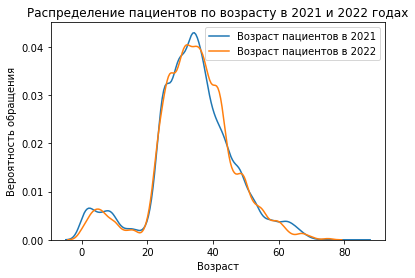

In [77]:
sns.kdeplot(df.loc[(df['year']==2021) & (df['month'] <= 8)]['age_for_service_date'])
sns.kdeplot(df.loc[(df['year']==2022) & (df['month'] <= 8)]['age_for_service_date'])

plt.legend(['Возраст пациентов в 2021', 'Возраст пациентов в 2022'])
plt.title('Распределение пациентов по возрасту в 2021 и 2022 годах')
plt.xlabel('Возраст')
plt.ylabel('Вероятность обращения')

plt.show()

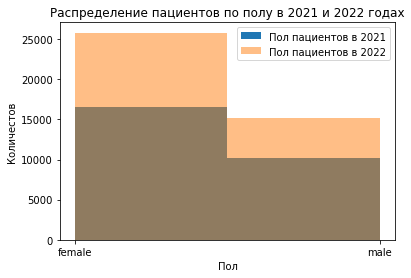

In [78]:
plt.hist(df.loc[(df['year']==2021) & (df['month'] <= 8)]['sex_id'], bins=2)
plt.hist(df.loc[(df['year']==2022) & (df['month'] <= 8)]['sex_id'], bins=2, alpha = 0.5)

plt.legend(['Пол пациентов в 2021', 'Пол пациентов в 2022'])
plt.title('Распределение пациентов по полу в 2021 и 2022 годах')
plt.xlabel('Пол')
plt.ylabel('Количестов')

plt.show()

### Выыод:
#### Отвергаем Н0 в пользу Н1. 

Половозрастная структура за аналогичный период 21 и 22 года очень похожа.

### Гипотеза 4:
#### Н0: Изменения структуры оказываемых услуг не повлияло на среднюю стоимость обслуживания пациентов.
#### Н1: Изменения структуры оказываемых услуг  повлияло на среднюю стоимость обслуживания пациентов.

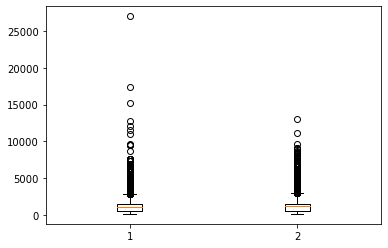

In [79]:
t1 = df.loc[(df['year']==2021) & (df['month'] <= 8)]['service_amount']     
t2 = df.loc[(df['year']==2022) & (df['month'] <= 8)]['service_amount']
            
            
plt.boxplot([t1,t2])

plt.show()

Так как 3 квартиль у обоих сравниваемых периодов примерно одинаковый, посмотрим на количество купленных услуг дороже 3 квартиля. 

In [80]:
df.loc[(df['year']==2021) & (df['month'] <= 8)]['service_amount'].describe()

count    26715.000000
mean      1120.555381
std        818.509160
min        147.000000
25%        525.000000
50%       1092.000000
75%       1470.000000
max      26999.000000
Name: service_amount, dtype: float64

In [81]:
print('Количестов услуг дороже 3 квартиля в 2021 году:', len(df.loc[(df['year']==2021) & (df['month'] <= 8)]['service_amount']>1470))


Количестов услуг дороже 3 квартиля в 2021 году: 26715


In [82]:
df.loc[(df['year']==2022) & (df['month'] <= 8)]['service_amount'].describe()

count    40977.000000
mean      1195.467262
std        779.103772
min        150.000000
25%        600.000000
50%       1200.000000
75%       1540.000000
max      13000.000000
Name: service_amount, dtype: float64

In [83]:
print('Количестов услуг дороже 3 квартиля в 2022 году:', len(df.loc[(df['year']==2022) & (df['month'] <= 8)]['service_amount']>1470))


Количестов услуг дороже 3 квартиля в 2022 году: 40977


### Вывод:
#### Отвергаем Н0 в пользу Н1.
В 2022 году наблюдается рост покупок более дорогих услуг (дороже 3 квартиля) почти на 50%. Это согласуется с общим трендом на более заметный рост средней стоимости обслуживания одного пациента, чем медианное значение.

# Общие выводы:

    Перед тем, как указать итоговые выводы, хочу заострить внимание еще на одной детали. Когда мы смотрели динамику прибыли и количества услуг за 2022 год, мы заметили не только, то, что в августе закончились данные. Но и то, что в апреле прибыль и количество улслуг начали резко снижаться, другими словами - тренд нарушился. Во время проверки гипотез, я также рассмотрел временные промежутки и для периода с января по арпель. Важно отметить, что указанные ниже выводы справедливы и для периода полного совпадения тренда и сезонности для 2021 и 2022 годов. Все зависимости остаются прежними, но цифры несколько отличаются.

    1. Данные за 2022 год неполные, поэтому общие трендны будем описывать с этой оговоркой.
    2. В прибыли и количестве проданных услуг наблюдается:
        - тренд на рост
        - сезонные скачки с февраля по март и  с сентября по октябрь (по 1 месяцу)
    3. Прибыль и количество проданных услуг сильно связаны друг с другом
    4. В 2022 году добавилось 136 новых услуг, при этом общее число возможных услуг упало. 
    5. Распределение пациентов по полу и возрасту совпадает в 21 и в 22 годах.
    7. Средняя стоимость годового лечения у мужчин осталась прежней, а у женщин выросла на 6%.
    8. Средняя стоимость лечения 1 пациента в год увеличилась почти на 2,7%
    9. Медианная стоимость лечения 1 пациента в год выросла на 0.4 %
    10.Можно выделить 3 драйвера роста средней годовой стоимости обслуживания пациентов:
        - рост цен на услуги в среднем в размере 8%
        - рост стоимости услуг для женщин
        - рост количества более дорогих услуг (выше 3 квартиля цены) на 50%
